<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h2>EXP 7</h2>
    <h2>Date:10/09/2024</h2>
    <h2>Reg No:URK22CS5090</h2><br>
    <center><h1>PERFORMANCE ANALYSIS ON KNN CLASSIFICATION TECHNIQUE</h1></center>
    <h4><b>Aim</b></h4>
    <p>To demonstrate the performance metrics for the tree-based classification techniques used in data science applications.</p>
    <h4><b>Description<b></h4>
        <p>K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well:

Lazy learning algorithm: KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.
Non-parametric learning algorithm: KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data. Working of KNN Algorithm K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training s
Confusion Matrix It is the easiest way to measure the performance of a classification problem where the output can be of two or more type of classes. A confusion matrix is nothing but a table with two dimensions viz.“Actual” and“Predicted” and furthermore, both the dimensions have “True Positives (TP)”, “True Negatives (TN)”, “False Positives (FP)”, “False Negatives (FN)”

Classification Accuracy

It is most common performance metric for classification algorithms. It may be defined as the number of correct predictions made as a ratio of all predictions made.

Classification Report

This report consists of the scores of Precisions, Recall, F1 and Support. Precision, used in document retrievals, may be defined as the number of correct documents returned by classification model.

AUC (Area Under ROC curve)

AUC (Area Under Curve)-ROC (Receiver Operating Characteristic) is a performance metric, based on varying threshold values, for classification problems. As name suggests, ROC is a probability curve and AUC measure the separability. In simple words, AUC-ROC metric will tell us about the capability of model in distinguishing the classes. Higher the AUC, better the model. Mathematically, it can be created by plotting TPR (True Positive Rate) i.e. Sensitivity or recall vs FPR (False Positive Rate) i.e. Specificity, at various threshold values.</p>
</body>
</html>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>a. Read the data</b></p>
</body>
</html>

In [75]:
dataset = pd.read_csv('wine (1).csv')

In [81]:
dataset.shape

(1000, 12)

In [86]:
print(dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             3
residual sugar          2
chlorides               3
free sulfur dioxide     0
total sulfur dioxide    0
density                 2
pH                      0
sulphates               2
alcohol                 0
quality                 0
dtype: int64


In [89]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad


In [91]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
995,7.7,0.60,0.06,2.00,0.079,19.0,41,0.99697,3.39,0.62,10.1,good
996,5.6,0.66,0.00,2.20,0.087,3.0,11,0.99378,3.71,0.63,12.8,good
997,5.6,0.66,0.00,2.20,0.087,3.0,11,0.99378,3.71,0.63,12.8,good
998,8.9,0.84,0.34,1.40,0.050,4.0,10,0.99554,3.12,0.48,9.1,good
999,6.4,0.69,0.00,1.65,0.055,7.0,12,0.99162,3.47,0.53,12.9,good


In [96]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1000.000000,1000.00000,997.000000,998.000000,997.000000,1000.000000,1000.000000,998.000000,1000.000000,998.000000,1000.000000
mean,8.728900,0.52829,0.295065,2.581062,0.089830,15.171000,48.328000,0.995351,3.286290,0.668246,10.240700
std,1.836602,0.17855,0.200065,1.239642,0.050458,9.972949,33.309788,0.044660,0.261311,0.184463,1.033161
min,4.600000,0.12000,0.000000,1.200000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,8.400000
25%,7.400000,0.40000,0.120000,2.000000,0.072000,7.000000,23.000000,0.996337,3.190000,0.560000,9.500000
50%,8.300000,0.52000,0.280000,2.300000,0.081000,13.000000,39.000000,0.997300,3.300000,0.620000,9.900000
75%,9.800000,0.63500,0.470000,2.700000,0.092000,20.250000,64.250000,0.998390,3.400000,0.740000,10.800000
max,15.900000,1.33000,1.000000,15.500000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.900000


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>b. Data Cleaning
a. Replace 0 in [‘chlorides’, ‘density’, ‘pH’, ‘sulphates’] column with NaN value
b. Identify the columns with null value<br>
c. Filling the null values by imputing the mean values in the corresponding
column</b></p>
</body>
</html>

In [104]:
#URK22CS5090_1_b
col=['chlorides', 'density', 'pH', 'sulphates']
dataset[col]=dataset[col].replace(0,np.NaN)
print(dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             3
residual sugar          2
chlorides               9
free sulfur dioxide     0
total sulfur dioxide    0
density                 4
pH                      4
sulphates               3
alcohol                 0
quality                 0
dtype: int64


In [107]:
#URK22CS5090_1_b
null_columns = dataset.columns[dataset.isnull().any()]
print(f"Columns with null values: {null_columns}")

Columns with null values: Index(['citric acid', 'residual sugar', 'chlorides', 'density', 'pH',
       'sulphates'],
      dtype='object')


In [26]:
numerical_cols = dataset.select_dtypes(include=np.number).columns
dataset.loc[:, numerical_cols].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.279610,0.693312,0.153593,0.024667,-0.143668,-0.176346,0.048403,-0.400104,0.175547,0.066540
volatile acidity,-0.279610,1.000000,-0.538017,-0.014808,0.008744,0.017643,0.121062,-0.060043,0.156791,-0.245826,-0.162101
citric acid,0.693312,-0.538017,1.000000,0.131456,0.185616,-0.053795,-0.016711,0.072515,-0.324265,0.290837,0.169614
residual sugar,0.153593,-0.014808,0.131456,1.000000,-0.014516,0.123406,0.132115,0.050205,-0.016666,0.009667,0.137558
chlorides,0.024667,0.008744,0.185616,-0.014516,1.000000,-0.006099,0.032883,0.012830,-0.141003,0.391273,-0.173634
free sulfur dioxide,-0.143668,0.017643,-0.053795,0.123406,-0.006099,1.000000,0.693624,-0.036656,0.051167,0.057618,-0.033260
total sulfur dioxide,-0.176346,0.121062,-0.016711,0.132115,0.032883,0.693624,1.000000,-0.016596,-0.024589,0.053294,-0.187492
density,0.048403,-0.060043,0.072515,0.050205,0.012830,-0.036656,-0.016596,1.000000,-0.011326,0.034932,0.020455
pH,-0.400104,0.156791,-0.324265,-0.016666,-0.141003,0.051167,-0.024589,-0.011326,1.000000,-0.171883,0.128907
sulphates,0.175547,-0.245826,0.290837,0.009667,0.391273,0.057618,0.053294,0.034932,-0.171883,1.000000,0.107702


In [41]:
#URK22CS5090_1_c
#Clean the data

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide']
dataset[cols] = dataset[cols].replace({'0':np.nan, 0:np.nan})
#b. Identify the columns with null value
dataset.isnull().sum()
dataset.dropna(inplace=True)
dataset.shape
#c. Filling the null values by imputing the mean values in the corresponding column
dataset['fixed acidity'].fillna(dataset['fixed acidity'].mean(), inplace = True)
dataset['volatile acidity'].fillna(dataset['volatile acidity'].mean(), inplace = True)
dataset['citric acid'].fillna(dataset['citric acid'].mean(), inplace = True)
dataset['residual sugar'].fillna(dataset['residual sugar'].mean(), inplace = True)
dataset['chlorides'].fillna(dataset['chlorides'].mean(), inplace = True)
dataset['free sulfur dioxide'].fillna(dataset['free sulfur dioxide'].mean(), inplace = True)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>c. Use the columns: [‘fixed acidity’, ‘volatile acidity’, ‘citric acid’, ‘residual sugar’,
‘chlorides’, ‘free sulfur dioxide’] as the independent variables</b></p>
</body>
</html>

In [45]:
#URK22CS5090_1_c
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide']].values

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>d.Use the target variable as 'quality' ('good' and 'bad' based on score >5 and <5)</b></p>
</body>
</html>

In [47]:
#URK22CS5090_1_d
dataset['quality'].replace({0:"No", 1:"Yes"})
y = dataset['quality'].values

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>e. Encode the categorical value of the target column to numerical value</b></p>
</body>
</html>

In [49]:
#URK22CS5090_1_e
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>f. Divide the data into training (75%) and testing set (25%)</b></p>
</body>
</html>

In [51]:
#URK22CS5090_1_f
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 6)
(230, 6)
(688,)
(230,)


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.44822497  1.40186759 -1.01944737  0.23471207 -0.17866433  1.51543995]
 [-0.04544437  0.95135792 -0.00527568  0.31081099 -0.10853393  0.80703337]
 [-1.74586099 -1.18856305  0.31498906 -0.90677171 -0.31892513 -0.30617697]
 ...
 [-0.92307875  0.72610308 -0.69918262 -0.60237603 -0.38905553 -0.20497603]
 [ 0.00940778 -1.58275902  1.22240584 -0.0696836  -0.16113173  1.00943525]
 [-0.10029652 -1.07593563  0.47512144  0.00641532 -0.16113173  0.09862679]]
[[ 1.7098244   0.2755934   1.00889601  0.00641532 -0.17866433 -0.91338261]
 [-0.26485296 -0.51279853 -0.05865314  0.61520667 -0.23126213 -0.81218167]
 [ 0.06425993 -0.51279853  0.74200872 -0.52627711 -0.70464232 -0.91338261]
 ...
 [-0.9779309  -0.79436708  0.95551855 -0.0696836   0.08432467  1.81904277]
 [-0.75852231  0.16296598 -0.48567279 -0.29798036  0.24211807 -0.30617697]
 [ 0.99674647 -1.18856305  0.95551855 -0.29798036 -0.51178372  0.30102867]]


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>g. Perform the classification with K=3</b></p>
</body>
</html>

In [55]:
#URK22CS5090_1_g
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
classifier.predict(sc.transform([[7.4, 0.66, 0.0, 1.8, 0.075, 13.0]]))


array([0])

In [61]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]

In [63]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[79 33]
 [43 75]]


0.6695652173913044

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>h. Analyse the performance of the classifier with various performance measures and
display such as confusion matrix, accuracy, recall, precision, specificity, f-score,
Receiver operating characteristic (ROC) curve and Area Under Curve (AUC) score</b></p>
</body>
</html>

In [65]:
#URK22CS5090_1_h
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
pc = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("Accuracy Score: ", ac)
print("Recall Score: ", rc)
print("Precision Score: ", pc)
print("F1 Score: ", f1)
print(classification_report(y_test, y_pred))

Confusion Matrix: 
 [[79 33]
 [43 75]]
Accuracy Score:  0.6695652173913044
Recall Score:  0.635593220338983
Precision Score:  0.6944444444444444
F1 Score:  0.6637168141592921
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       112
           1       0.69      0.64      0.66       118

    accuracy                           0.67       230
   macro avg       0.67      0.67      0.67       230
weighted avg       0.67      0.67      0.67       230



In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you are using a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # Create a LogisticRegression model

# Assuming you have X_train and y_train defined
model.fit(X_train, y_train) # Train the model

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6821277239709442


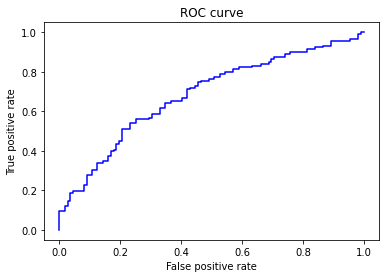

In [69]:
plt.plot(fpr, tpr, linestyle="-", color="blue")
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>i. Change the value of K in KNN with 5,7,9,11 and tabulate the various TP, TN,
accuracy, f-score and AUC score obtained</b></p>
</body>
</html>

In [71]:
#URK22CS5090_1_i
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

# Assuming X and y are already defined from your previous code

# List of K values to test
k_values = [5, 7, 9, 11]

# Initialize an empty list to store results
results = []

for k in k_values:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Train KNN classifier with current K value
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)

    # Predict on test set
    y_pred = classifier.predict(X_test)

    # Calculate performance metrics
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extract TP, TN, FP, FN
    accuracy = accuracy_score(y_test, y_pred)
    
    # Fix: Specify 'pos_label' to match your labels 
    f_score = f1_score(y_test, y_pred)#, pos_label='Yes'
    
    auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

    # Store results in a dictionary
    result = {
        "K": k,
        "TP": tp,
        "TN": tn,
        "Accuracy": accuracy,
        "F-score": f_score,
        "AUC": auc
    }
    results.append(result)

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)

    K  TP  TN  Accuracy   F-score       AUC
0   5  75  73  0.643478  0.646552  0.656855
1   7  76  73  0.647826  0.652361  0.671837
2   9  75  73  0.643478  0.646552  0.664081
3  11  74  76  0.652174  0.649123  0.671799


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>j. Analyse and infer for which K value, the classification algorithm provides better
performance.</b></p>
</body>
</html>

In [73]:
#URK22CS5090_1_j
sorted_results = results_df.sort_values(by=['Accuracy', 'F-score'], ascending=[False, False])
# Get the K value from the first row (highest accuracy and F-score)
best_k = sorted_results.iloc[0]['K']
# Print the best K value
print(f"The best K value (with tie-breaker) is: {best_k}")

The best K value (with tie-breaker) is: 11.0


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <h1>Result</h1>
    <p><b></b></p>
</body>
</html>